# Multiple Linear Regression - Toyota Corolla Price Prediction
**Assignment:** Predict the price of Toyota Corolla using Multiple Linear Regression.


## Exploratory Data Analysis (EDA)

In [46]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
df = pd.read_csv('ToyotaCorolla - MLR.csv')
df.head()

,Price,Age_08_04,KM,Fuel_Type,HP,Automatic,cc,Doors,Cylinders,Gears,Weight
0,13500,23,46986,Diesel,90,0,2000,3,4,5,1165
1,13750,23,72937,Diesel,90,0,2000,3,4,5,1165
2,13950,24,41711,Diesel,90,0,2000,3,4,5,1165
3,14950,26,48000,Diesel,90,0,2000,3,4,5,1165
4,13750,30,38500,Diesel,90,0,2000,3,4,5,1170


In [47]:
df.rename(columns={'Age_08_04': 'Age', 'Fuel_Type': 'FuelType', 'cc': 'CC',
                  'Weight': 'Weight', 'Price': 'Price'}, inplace=True)

In [48]:
df.info()
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1436 entries, 0 to 1435
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Price      1436 non-null   int64 
 1   Age        1436 non-null   int64 
 2   KM         1436 non-null   int64 
 3   FuelType   1436 non-null   object
 4   HP         1436 non-null   int64 
 5   Automatic  1436 non-null   int64 
 6   CC         1436 non-null   int64 
 7   Doors      1436 non-null   int64 
 8   Cylinders  1436 non-null   int64 
 9   Gears      1436 non-null   int64 
 10  Weight     1436 non-null   int64 
dtypes: int64(10), object(1)
memory usage: 123.5+ KB


,0
Price,0
Age,0
KM,0
FuelType,0
HP,0
Automatic,0
CC,0
Doors,0
Cylinders,0
Gears,0


In [49]:
df.describe()

,Price,Age,KM,HP,Automatic,CC,Doors,Cylinders,Gears,Weight
count,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.00000,1436.000000,1436.0,1436.000000,1436.00000
mean,10730.824513,55.947075,68533.259749,101.502089,0.055710,1576.85585,4.033426,4.0,5.026462,1072.45961
std,3626.964585,18.599988,37506.448872,14.981080,0.229441,424.38677,0.952677,0.0,0.188510,52.64112
min,4350.000000,1.000000,1.000000,69.000000,0.000000,1300.00000,2.000000,4.0,3.000000,1000.00000
25%,8450.000000,44.000000,43000.000000,90.000000,0.000000,1400.00000,3.000000,4.0,5.000000,1040.00000
50%,9900.000000,61.000000,63389.500000,110.000000,0.000000,1600.00000,4.000000,4.0,5.000000,1070.00000
75%,11950.000000,70.000000,87020.750000,110.000000,0.000000,1600.00000,5.000000,4.0,5.000000,1085.00000
max,32500.000000,80.000000,243000.000000,192.000000,1.000000,16000.00000,5.000000,4.0,6.000000,1615.00000


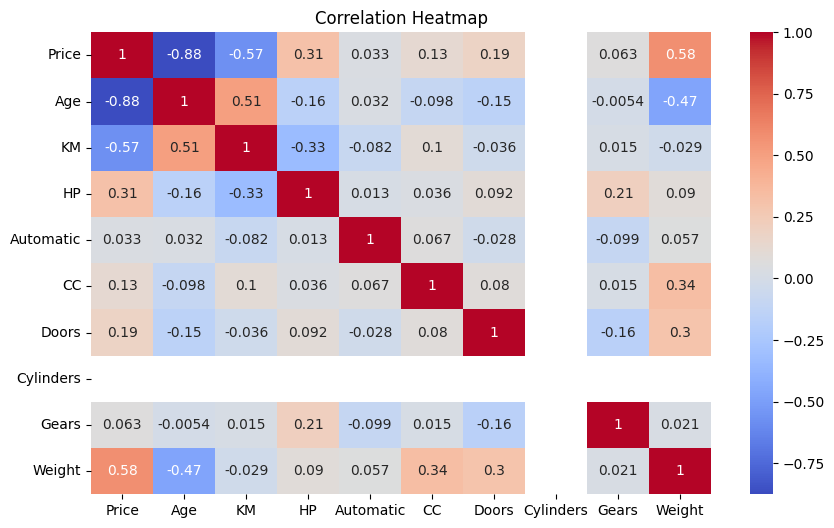

In [51]:
numeric_df = df.select_dtypes(include=[np.number])

# Correlation heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

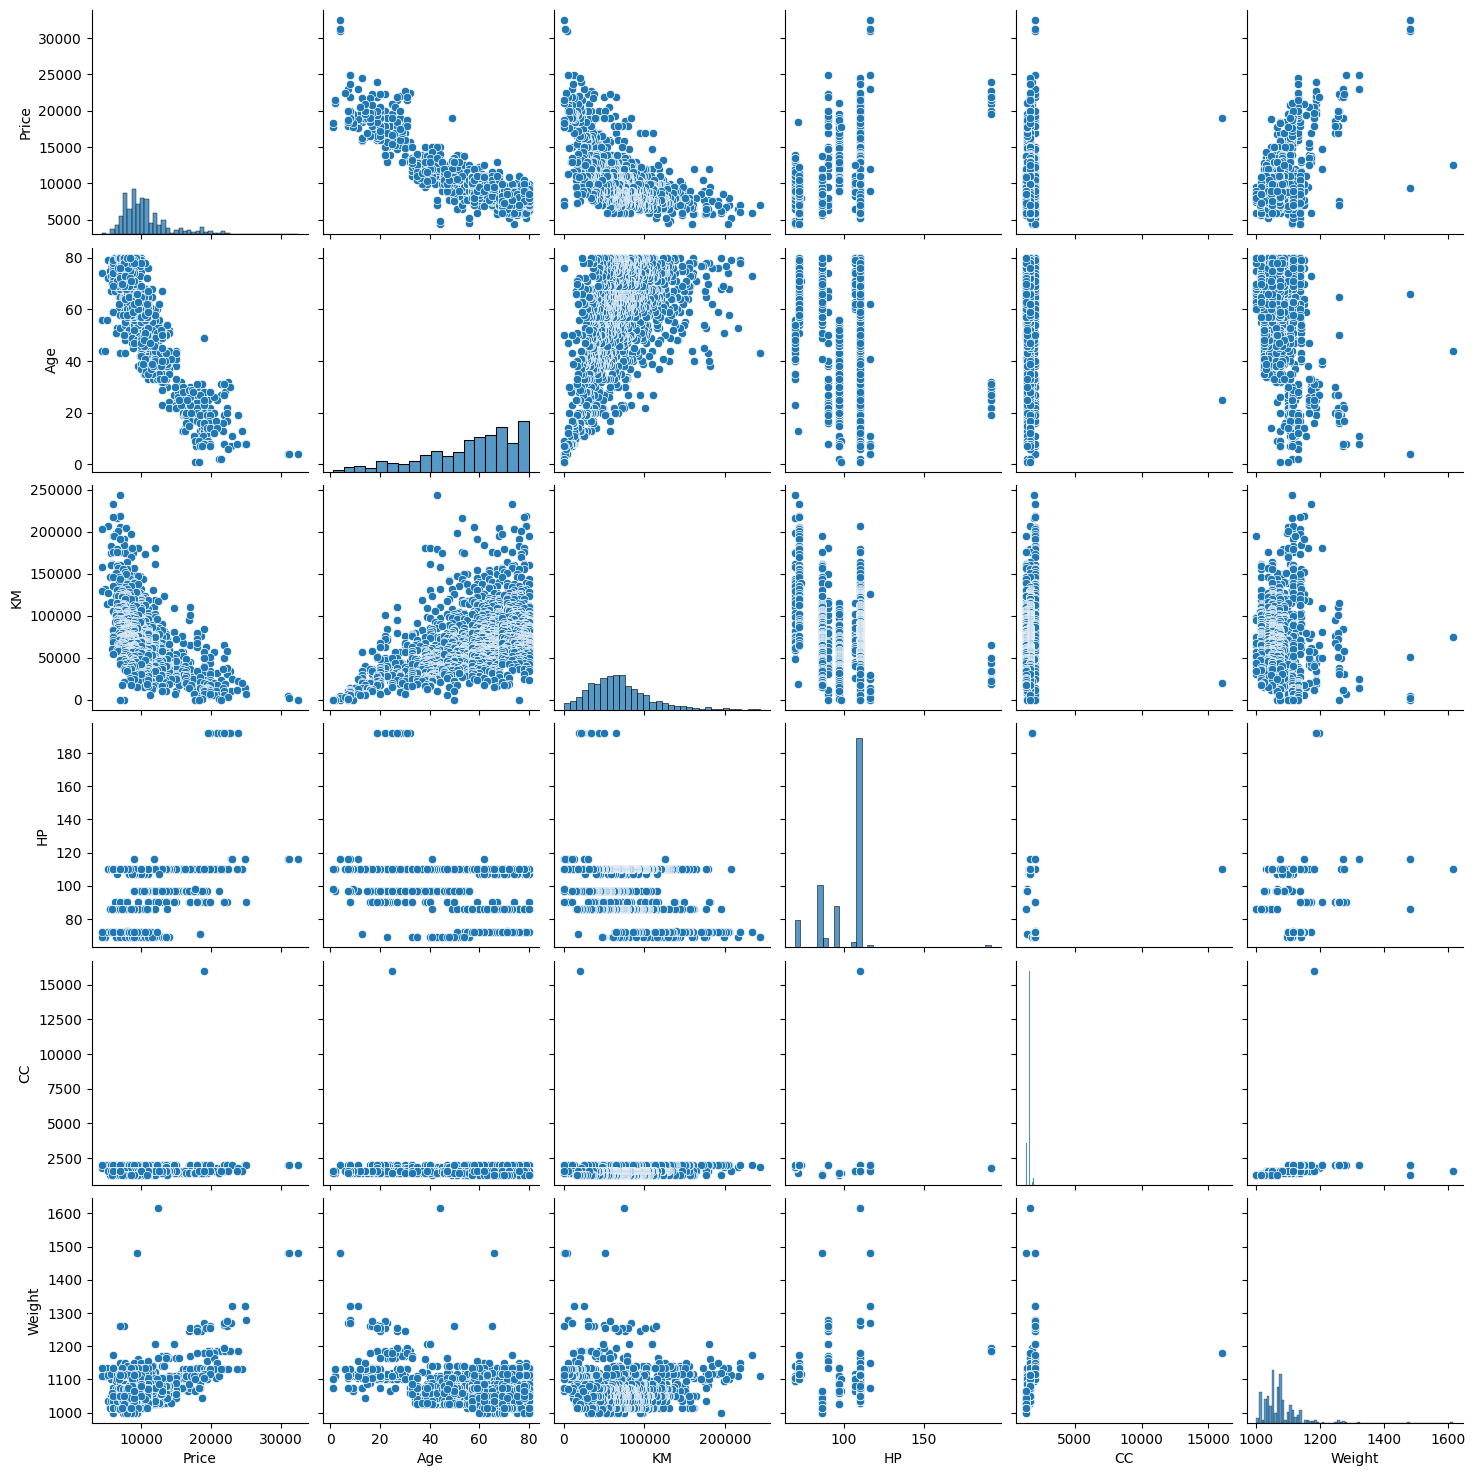

In [52]:
# Pairplot
sns.pairplot(df[['Price', 'Age', 'KM', 'HP', 'CC', 'Weight']])
plt.show()

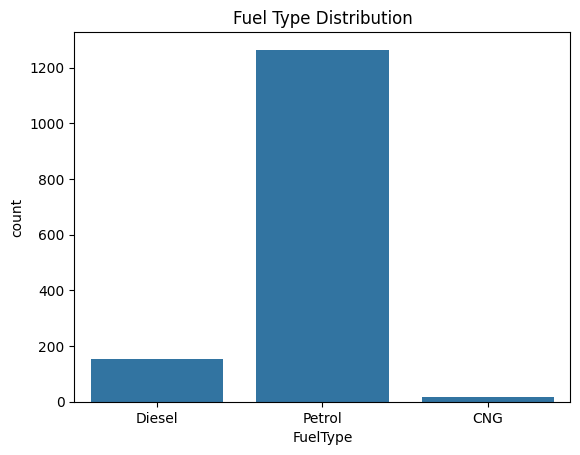

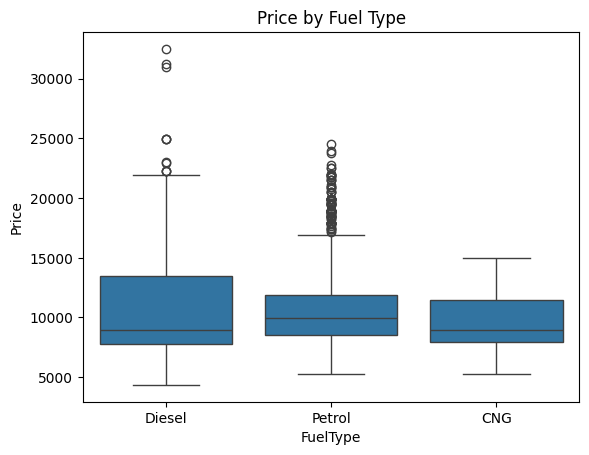

In [53]:
# Categorical variable visualization
sns.countplot(data=df, x='FuelType')
plt.title('Fuel Type Distribution')
plt.show()

sns.boxplot(data=df, x='FuelType', y='Price')
plt.title('Price by Fuel Type')
plt.show()

In [54]:
# One-hot encode FuelType
df_encoded = pd.get_dummies(df, columns=['FuelType'], drop_first=True)
df_encoded.head()

,Price,Age,KM,HP,Automatic,CC,Doors,Cylinders,Gears,Weight,FuelType_Diesel,FuelType_Petrol
0,13500,23,46986,90,0,2000,3,4,5,1165,True,False
1,13750,23,72937,90,0,2000,3,4,5,1165,True,False
2,13950,24,41711,90,0,2000,3,4,5,1165,True,False
3,14950,26,48000,90,0,2000,3,4,5,1165,True,False
4,13750,30,38500,90,0,2000,3,4,5,1170,True,False


## Train-Test Split

In [55]:
X = df_encoded.drop(['Price'], axis=1)
y = df_encoded['Price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Build Multiple Linear Regression Models

In [56]:
# Model 1: All features
model1 = LinearRegression()
model1.fit(X_train, y_train)
y_pred1 = model1.predict(X_test)
pd.DataFrame(model1.coef_, X.columns, columns=['Coefficient'])

,Coefficient
Age,-1.208305e+02
KM,-1.623141e-02
HP,1.403948e+01
Automatic,1.488309e+02
CC,-3.037219e-02
Doors,-6.031097e+01
Cylinders,-1.620037e-12
Gears,5.516007e+02
Weight,2.588496e+01
FuelType_Diesel,-6.854876e+01


In [57]:
# Model 2: Top correlated features
selected_features = ['Age', 'KM', 'HP', 'Weight']
model2 = LinearRegression()
model2.fit(X_train[selected_features], y_train)
y_pred2 = model2.predict(X_test[selected_features])
pd.DataFrame(model2.coef_, selected_features, columns=['Coefficient'])

,Coefficient
Age,-120.025405
KM,-0.020233
HP,29.052170
Weight,19.769066


In [58]:
# Model 3: Drop CC (multicollinear)
X_train3 = X_train.drop('CC', axis=1)
X_test3 = X_test.drop('CC', axis=1)
model3 = LinearRegression()
model3.fit(X_train3, y_train)
y_pred3 = model3.predict(X_test3)
pd.DataFrame(model3.coef_, X_train3.columns, columns=['Coefficient'])

,Coefficient
Age,-1.208248e+02
KM,-1.624126e-02
HP,1.380545e+01
Automatic,1.420478e+02
Doors,-6.076219e+01
Cylinders,-3.979039e-13
Gears,5.515618e+02
Weight,2.586885e+01
FuelType_Diesel,-8.678610e+01
FuelType_Petrol,1.370436e+03


## Model Evaluation

In [59]:
def evaluate_model(y_true, y_pred, model_name):
    print(f"📊 Evaluation for {model_name}")
    print("R² Score:", r2_score(y_true, y_pred))
    print("RMSE:", np.sqrt(mean_squared_error(y_true, y_pred)))
    print("MAE:", mean_absolute_error(y_true, y_pred))
    print("-" * 40)

In [60]:
evaluate_model(y_test, y_pred1, 'Model 1: All Features')

📊 Evaluation for Model 1: All Features
R² Score: 0.8348888040611082
RMSE: 1484.2654153296514
MAE: 990.8872739193926
----------------------------------------


In [61]:
evaluate_model(y_test, y_pred2, 'Model 2: Top Correlated Features')

📊 Evaluation for Model 2: Top Correlated Features
R² Score: 0.8506068681500583
RMSE: 1411.85020911323
MAE: 1001.2017466053621
----------------------------------------


In [62]:
evaluate_model(y_test, y_pred3, 'Model 3: Without CC')

📊 Evaluation for Model 3: Without CC
R² Score: 0.8348264251697731
RMSE: 1484.5457660574468
MAE: 991.2629570275744
----------------------------------------


## Lasso and Ridge Regression

In [63]:
# Ridge
ridge = Ridge(alpha=1.0)
ridge.fit(X_train, y_train)
y_pred_ridge = ridge.predict(X_test)
evaluate_model(y_test, y_pred_ridge, 'Ridge Regression')
pd.DataFrame(ridge.coef_, X.columns, columns=['Ridge Coefficient'])

📊 Evaluation for Ridge Regression
R² Score: 0.8351359377712336
RMSE: 1483.1541963778882
MAE: 990.7338342026006
----------------------------------------


,Ridge Coefficient
Age,-120.779659
KM,-0.016324
HP,14.141834
Automatic,146.907470
CC,-0.030509
Doors,-59.905791
Cylinders,0.000000
Gears,542.272328
Weight,25.821019
FuelType_Diesel,-128.813072


In [64]:
# Lasso
lasso = Lasso(alpha=0.1)
lasso.fit(X_train, y_train)
y_pred_lasso = lasso.predict(X_test)
evaluate_model(y_test, y_pred_lasso, 'Lasso Regression')
pd.DataFrame(lasso.coef_, X.columns, columns=['Lasso Coefficient'])

📊 Evaluation for Lasso Regression
R² Score: 0.8349467801805
RMSE: 1484.0048045827486
MAE: 990.8940127223727
----------------------------------------


,Lasso Coefficient
Age,-120.827216
KM,-0.016241
HP,14.091453
Automatic,147.287981
CC,-0.030575
Doors,-60.147193
Cylinders,0.000000
Gears,548.658386
Weight,25.868659
FuelType_Diesel,-64.924880
